# dA

In [50]:
import xarray as xr
import scipy
import numpy as np
import hvplot.xarray
from matplotlib import pyplot as plt

In [3]:
fn = '/datadrive/NCCFs/old/6year_NCCF_201.nc'
NCCFs = xr.open_dataarray(fn)

In [8]:
dA_f = xr.DataArray(scipy.fft.fft(NCCFs.loc[:,-2.5:-1.5].values, axis=1), dims=['dates','frequency'], coords={'dates':NCCFs.dates, 'frequency':np.arange(200)})

In [20]:
dA_f.name = 'dA frequency'

In [35]:
np.abs(dA_f[::50,:]).hvplot(x='dates', y='frequency', rasterize=True, cnorm='log', ylim=(0,100), cmap='inferno')

:DynamicMap   []
   :Image   [dates,frequency]   (dA frequency)

In [42]:
np.isnan(dA_f[:,0])

<xarray.DataArray 'dA frequency' (dates: 52407)>
array([ True,  True,  True, ..., False, False, False])
Coordinates:
  * dates      (dates) datetime64[ns] 2015-01-05T04:00:00 ... 2020-12-27T18:0...
    frequency  int64 0

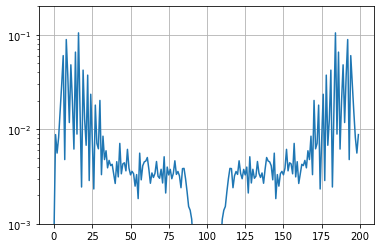

In [59]:
plt.plot(np.abs(np.percentile(dA_f[~np.isnan(dA_f[:,0]).values,:], 0.99, axis=0)))
plt.yscale('log')
plt.ylim([1e-3, 2e-1])
plt.grid()

In [33]:
(np.abs(dA_f.loc[:,5]).hvplot(logy=True, grid=True, height=200) + \
np.abs(dA_f.loc[:,10]).hvplot(logy=True, grid=True, height=200) + \
np.abs(dA_f.loc[:,15]).hvplot(logy=True, grid=True, height=200)).cols(1)

:Layout
   .Curve.I   :Curve   [dates]   (dA frequency)
   .Curve.II  :Curve   [dates]   (dA frequency)
   .Curve.III :Curve   [dates]   (dA frequency)